# Simple RNN

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0,2000)
X= np.sin(0.01*t)

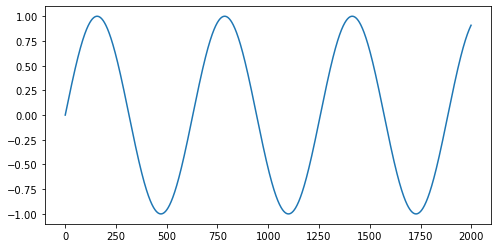

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(X)

In [4]:
X_train, X_test = X[:1500],X[1500:]

In [5]:
model = Sequential()
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))

In [6]:
model.compile(loss='mean_absolute_error',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# e.g.
#seqence = 3 steps
#[
#    [0.        , 0.00999983, 0.01999867] -> [0.0299955]
#    [0.00999983, 0.01999867, 0.0299955]  -> [0.03998933]
#    [0.01999867, 0.0299955 , 0.03998933] -> [0.04997917]
#    ...
#]

In [8]:
seqence = 15

In [9]:
XT,yT = [],[] #XT: x train , yT: y train 
for i in range(len(X_train) - seqence ):
    d = i + seqence
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [10]:
Xt,yt = [],[] #XT: x test , yT: y test 
for i in range(len(X_test) - seqence):
    d = i + seqence
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [11]:
XT = np.array(XT) 
yT = np.array(yT)
Xt = np.array(Xt)
yt = np.array(yt)

In [12]:
XT.shape

(1485, 15)

In [13]:
XT = np.reshape(XT,(XT.shape[0],XT.shape[1],1))
Xt = np.reshape(Xt,(Xt.shape[0],Xt.shape[1],1))

In [14]:
model.fit(XT,yT,epochs=100,batch_size=20,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [15]:
model.evaluate(Xt, yt)

485/485 [==============================] - 0s 305us/sample - loss: 0.0013


0.001322371205651038

In [16]:
XTPredicted=model.predict(XT)
XtPredicted=model.predict(Xt)
XFinal=np.concatenate([XTPredicted,XtPredicted], axis=0) 

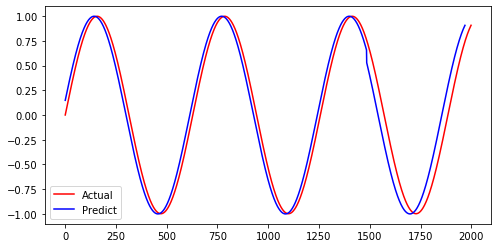

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(X,color='red',label='Actual')
plt.plot(XFinal,color='blue', label='Predict')
plt.legend()